# STM Modelling 

In [41]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib

In [51]:
data = pd.read_csv("./CSVFiles/data.csv").drop(columns=["Unnamed: 0"])

data.loc[data['season'] == 1, 'season'] = "Winter"
data.loc[data['season'] == 2, 'season'] = "Spring"
data.loc[data['season'] == 3, 'season'] = "Summer"
data.loc[data['season'] == 4, 'season'] = "Fall"

data = pd.get_dummies(data=data, columns=["holiday"], dtype=bool)
data = pd.get_dummies(data=data, columns=["weekday"], dtype=bool)
data = pd.get_dummies(data=data, columns=["weathersit"], dtype=bool)

data_2 = data.copy()

data = pd.get_dummies(data=data, columns=["season"], dtype=bool, prefix="", prefix_sep="")
data = pd.get_dummies(data=data, columns=["yr"], dtype=bool)
data = pd.get_dummies(data=data, columns=["mnth"], dtype=bool)
data = pd.get_dummies(data=data, columns=["hr"], dtype=bool)
data = pd.get_dummies(data=data, columns=["workingday"], dtype=bool)
data.head()

,dteday,temp,atemp,hum,windspeed,cnt,holiday_0,holiday_1,weekday_0,weekday_1,...,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,workingday_0,workingday_1
0,2011-01-01,0.24,0.2879,0.81,0.0,16,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2011-01-01,0.22,0.2727,0.80,0.0,40,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2011-01-01,0.22,0.2727,0.80,0.0,32,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2011-01-01,0.24,0.2879,0.75,0.0,13,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2011-01-01,0.24,0.2879,0.75,0.0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [4]:
stations = pd.read_csv("./CSVFiles/stations.csv").drop(columns=["Unnamed: 0"])
stations.head()

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"


In [5]:
trips = pd.read_csv("./CSVFiles/trips.csv").drop(columns=["Unnamed: 0"])
trips.head()

,ID,StartStationID,EndStationID,Duration,StartDate,EndDate
0,1,39,32,2,2011-01-01 00:55:00,2011-01-01 00:57:00
1,2,13,5,11,2011-01-01 00:28:00,2011-01-01 00:39:00
2,3,21,27,32,2010-12-31 23:39:00,2011-01-01 00:11:00
3,4,12,13,3,2011-01-01 00:07:00,2011-01-01 00:10:00
4,5,5,6,22,2011-01-01 00:07:00,2011-01-01 00:29:00


## Feature Selection
### Correlation maps between weather, time and count of bikes BY HOUR

/tmp/ipykernel_20101/1060907336.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  con_corr = features.corr()


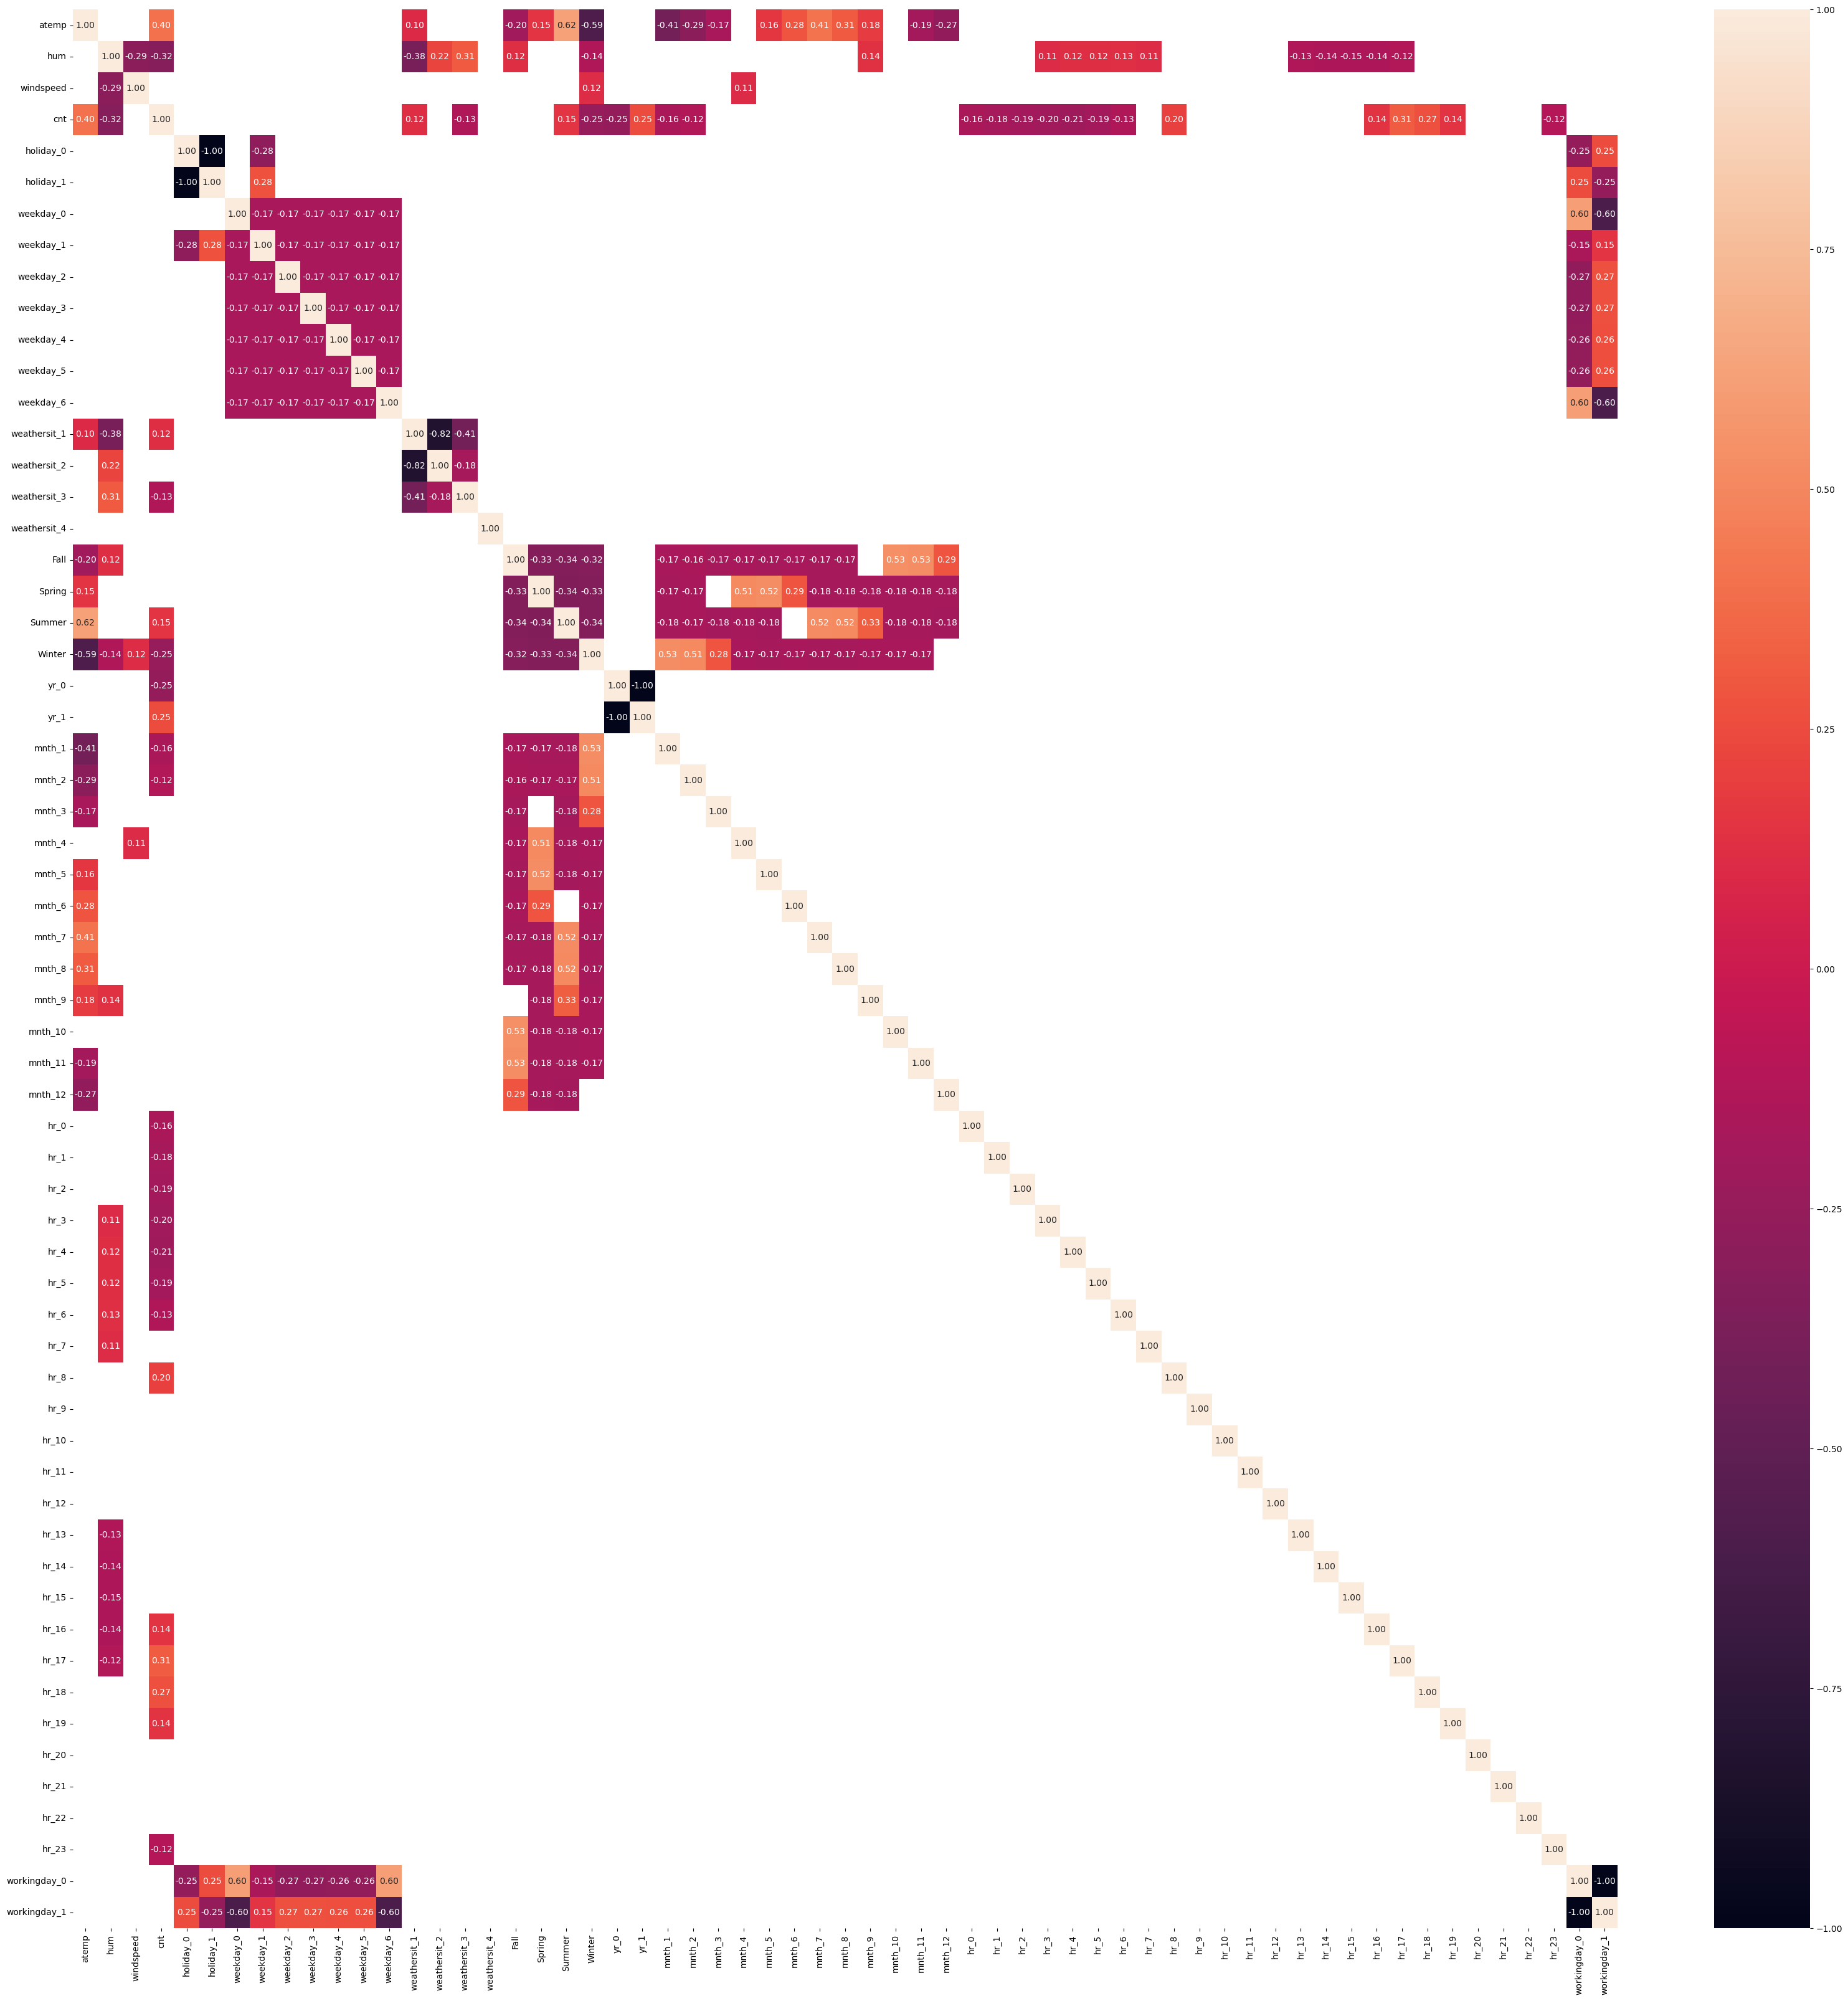

In [58]:
features = data.copy().drop(columns=["temp"])

con_corr = features.corr()
mask_con_corr = con_corr[(con_corr >= 0.1) | (con_corr <= -0.1)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(40,40))
fig = sns.heatmap(mask_con_corr, vmin=-1, vmax=1, annot=True, fmt='0.2f')

/tmp/ipykernel_20101/1505887467.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  con_corr = features_2.corr()


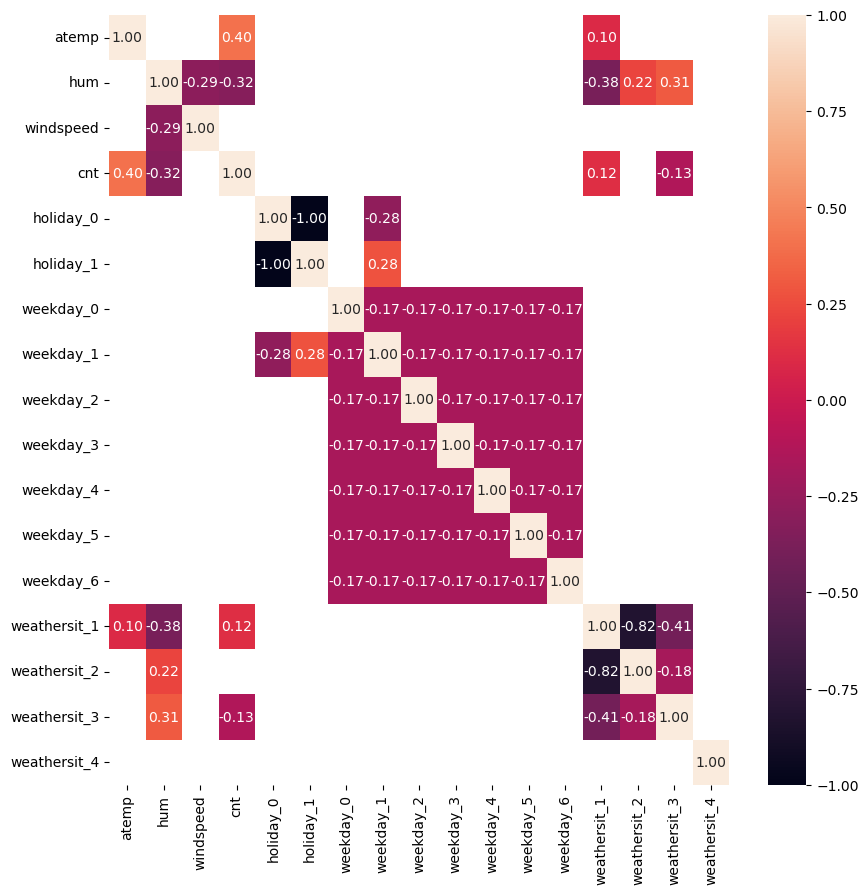

In [59]:
features_2 = data_2.copy().drop(columns=["temp", "yr", "mnth", "hr", "season", "workingday"])

con_corr = features_2.corr()
mask_con_corr = con_corr[(con_corr >= 0.1) | (con_corr <= -0.1)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
fig = sns.heatmap(mask_con_corr, vmin=-1, vmax=1, annot=True, fmt='0.2f')

/tmp/ipykernel_20101/403868884.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  con_corr = features_3.corr()


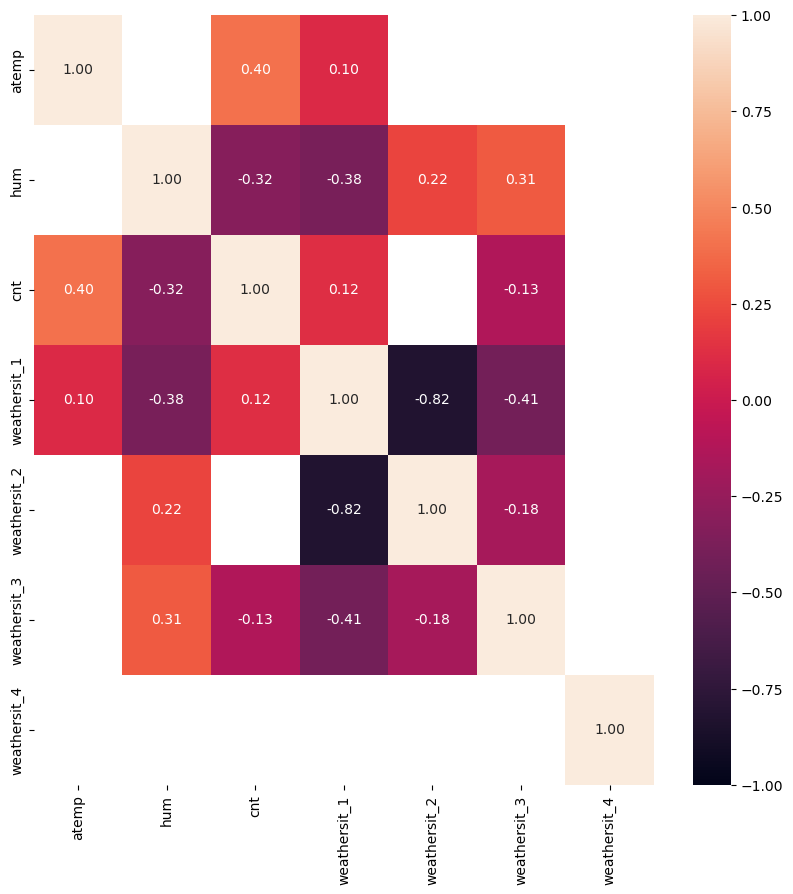

In [60]:
features_3 = features_2.copy().drop(columns=["windspeed", "holiday_0", "holiday_1", "weekday_0", "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6"])

con_corr = features_3.corr()
con_corr = con_corr[(con_corr >= 0.1) | (con_corr <= -0.1)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
fig = sns.heatmap(con_corr, vmin=-1, vmax=1, annot=True, fmt='0.2f')